## Movie recommendation algorithm by Ali Sasanian


##### Imported basic libraries

In [136]:
import pandas as pd
import numpy as np

##### loaded the data 

In [6]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
credits = pd.read_csv('tmdb_5000_credits.csv')

##### Merged the credits and movies to be able to understand the data set better and continue working

In [7]:
movies = movies.merge(credits, on = 'title')

In [9]:
movies.shape

(4809, 23)

In [127]:
movies.describe

<bound method NDFrame.describe of       movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4804      9367                               El Mariachi   
4805     72766                                 Newlyweds   
4806    231617                 Signed, Sealed, Delivered   
4807    126186                          Shanghai Calling   
4808     25975                         My Date with Drew   

                                               keywords  \
0     [cultureclash, future, spacewar, spacecolony, ...   
1     [ocean, drugabuse, exoticisland, eastindiatrad...   
2     [spy, basedonnovel, secretagent, sequel, mi6, ...   
3     [dc

In [10]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##### Got rid of columns that were not important and could not help with my work such as the URL for homepage of the production company that made the movie

In [12]:
movies = movies[['movie_id', 'title', 'genres', 'keywords', 'cast', 'crew', 'overview']]

In [14]:
movies.head()

,movie_id,title,genres,keywords,cast,crew,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","John Carter is a war-weary, former military ca..."


##### checking for NULL values

In [15]:
movies.isnull().sum()

movie_id    0
title       0
genres      0
keywords    0
cast        0
crew        0
overview    3
dtype: int64

##### Dropping NUll values

In [16]:
movies.dropna(inplace = True)

##### Checking for duplicate entries

In [17]:
movies.duplicated().sum()

0

##### I chose Keywords and genres as more important columns for my project and tried to see if I could find anything through exploring the data 

In [19]:
movies.head(1)['keywords'].values

array(['[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'],
      dtype=object)

In [20]:
movies.head(1)['keywords'].unique

<bound method Series.unique of 0    [{"id": 1463, "name": "culture clash"}, {"id":...
Name: keywords, dtype: object>

In [138]:
movies.head(1)['keywords'].values

array([list(['cultureclash', 'future', 'spacewar', 'spacecolony', 'society', 'spacetravel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marine', 'soldier', 'battle', 'loveaffair', 'antiwar', 'powerrelations', 'mindandsoul', '3d'])],
      dtype=object)

In [22]:
movies.head(1)['genres'].unique

<bound method Series.unique of 0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object>

In [25]:
movies['genres'].unique

<bound method Series.unique of 0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4804    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4805    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4806    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4807                                                   []
4808                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4806, dtype: object>

##### Using abstract syntax tree to process the grammar (values that are words)

In [26]:
import ast  ##### ast.litera_eval(obj) ##### Weird.library

In [27]:
def convert(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

In [28]:
movies['genres'] = movies['genres'].apply(convert)

In [29]:
movies['keywords'] = movies['keywords'].apply(convert)

In [30]:
def convert3(obj):
    l = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter!=3:
            l.append(i['name'])
            counter = counter + 1
        else:
            break
    return l

In [31]:
movies['cast'] = movies['cast'].apply(convert3)

##### Identifying the director

In [33]:
def fetch_director(obj):
    l = []
    counter = 0
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
            break
    return l

In [34]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [35]:
movies.head(5)

,movie_id,title,genres,keywords,cast,crew,overview
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],Following the death of District Attorney Harve...
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],"John Carter is a war-weary, former military ca..."


##### Using this split function turned overview into tokens.

In [36]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())

##### Removing space between words

In [37]:
movies['genres'] = movies['genres'].apply(lambda x: [i.replace(" ", "") for i in x])

In [38]:
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(" ", "") for i in x])
movies['cast'] = movies['cast'].apply(lambda x: [i.replace(" ", "") for i in x])
movies['crew'] = movies['crew'].apply(lambda x: [i.replace(" ", "") for i in x])

##### Placing words from other columns together and creating a tag column so it can help us reach an analysis without having too many columns

In [39]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [40]:
movies.head()

,movie_id,title,genres,keywords,cast,crew,overview,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send...","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili...","[John, Carter, is, a, war-weary,, former, mili..."


##### kept only the columns I was gonna use for the rest of the process

In [80]:
new_df = movies[['movie_id', 'title', 'tags', 'keywords']]

In [81]:
new_df.head()

,movie_id,title,tags,keywords
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p..."


##### Plotted tags and Keywords to see what are the words that I'm working with and potentially why the "tags" were generating a 1.0 for cosign similarity

In [141]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

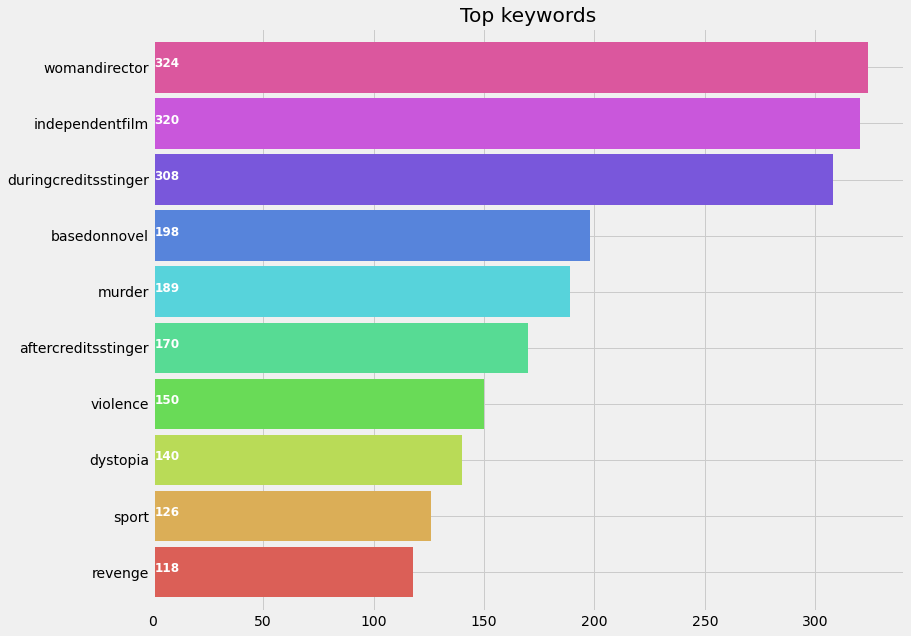

In [142]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['keywords']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top keywords')
plt.show()

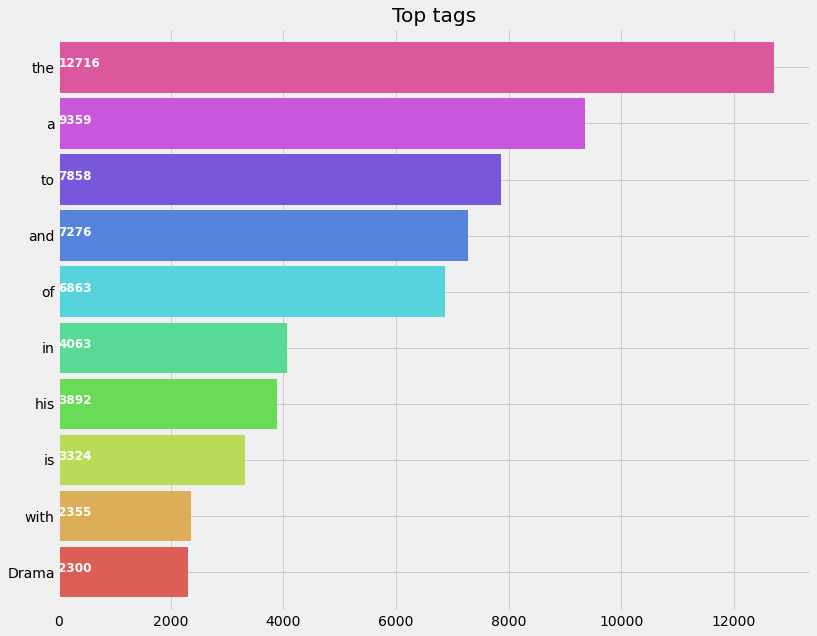

In [143]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['tags']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top tags')
plt.show()

##### joining tags to make a complete sentence.

##### At first I had only processed the "tags" for this section because I never have selected the "keywords" column to be in the new_df but had to come back and add "keywords" column due to the fact that I think I had populated the "tags" column so much that it was only generating cosign similarities of 1 between any 2 movies and could not be used to generate a real recommendation as every movie was the same as every other movie at that point. 

In [43]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

<ipython-input-43-e498c0e361a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


In [82]:
new_df['keywords'] = new_df['keywords'].apply(lambda x: " ".join(x))

<ipython-input-82-dcdbb9f208e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['keywords'] = new_df['keywords'].apply(lambda x: " ".join(x))


In [44]:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

<ipython-input-44-db70cfe1859e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())


In [83]:
new_df['keywords'] = new_df['keywords'].apply(lambda x: x.lower())

<ipython-input-83-ed5f72fdcd70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['keywords'] = new_df['keywords'].apply(lambda x: x.lower())


In [84]:
new_df.head()

,movie_id,title,tags,keywords
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",cultureclash future spacewar spacecolony socie...
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",ocean drugabuse exoticisland eastindiatradingc...
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",spy basedonnovel secretagent sequel mi6 britis...
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",dccomics crimefighter terrorist secretidentity...
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",basedonnovel mars medallion spacetravel prince...


##### Applying stemming bring words in my columns to their core state to be able to analyze them later

In [46]:
import nltk

In [47]:
from nltk.stem.porter import PorterStemmer

In [48]:
ps = PorterStemmer()

In [49]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [50]:
new_df['tags'] = new_df['tags'].apply(stem)

<ipython-input-50-be18a4346d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [85]:
new_df['keywords'] = new_df['keywords'].apply(stem)

<ipython-input-85-5eec540b01e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['keywords'] = new_df['keywords'].apply(stem)


In [86]:
new_df.head()

,movie_id,title,tags,keywords
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",cultureclash futur spacewar spacecoloni societ...
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",ocean drugabus exoticisland eastindiatradingco...
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",spi basedonnovel secretag sequel mi6 britishse...
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",dccomic crimefight terrorist secretident burgl...
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",basedonnovel mar medallion spacetravel princes...


##### Trying to make the tags and keywords column to become strings
##### This process started by me only takiing "tags" into consideration as well and later on added the "keywords"

In [67]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
new_df['tags'] = new_df['tags'].apply(xstr)

<ipython-input-67-95c2fe23dc1d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(xstr)


In [68]:
tagList=[]
for i in new_df['tags']:
    if i not in tagList:
        tagList.append(i)

In [69]:
def binary(tag_list):
    binaryList = []  
    for direct in tagList:
        if direct in tag_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [70]:
new_df['tags'] = new_df['tags'].apply(lambda x: binary(x))


<ipython-input-70-a29af63f8a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: binary(x))


##### trying to figure out how I can have both "keywords" and "tags" to be strings simultaneously
##### could not figure out and opted for using only the "keywords"

In [140]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
new_df['keywords'] = new_df['keywords'].apply(xstr)

In [88]:
tagList=[]
for i in new_df['keywords']:
    if i not in tagList:
        tagList.append(i)

In [89]:
def binary(tag_list):
    binaryList = []  
    for direct in tagList:
        if direct in tag_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [139]:
new_df.head()

,movie_id,title,keywords,tags,new_id
0,19995,Avatar,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",0
1,285,Pirates of the Caribbean: At World's End,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Captain, Barbossa,, long, believed, to, be, d...",1
2,206647,Spectre,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[A, cryptic, message, from, Bond’s, past, send...",2
3,49026,The Dark Knight Rises,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Following, the, death, of, District, Attorney...",3
4,49529,John Carter,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[John, Carter, is, a, war-weary,, former, mili...",4


##### gave up on tags and keywords becoming strings simultaneously and moved on with only keywords. As the tags column was generating similarities of only 1.0 and would not have made a difference later on when I would add them to each other. 

##### cosign similarity (using "tags" would only generate a cosign similarity

In [94]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = new_df.iloc[movieId1]
    b = new_df.iloc[movieId2]
    
    
    tagA = a['keywords']
    tagB = b['keywords']
    tagDistance = spatial.distance.cosine(tagA, tagB)
    
    
    return tagDistance

In [98]:
Similarity(5,106)

0.7958758547680684

In [79]:
print(movies.iloc[5])
print(movies.iloc[140])

movie_id                                                  559
title                                            Spider-Man 3
genres                           [Fantasy, Action, Adventure]
keywords    [dualidentity, amnesia, sandstorm, loveofone's...
cast                [TobeyMaguire, KirstenDunst, JamesFranco]
crew                                               [SamRaimi]
overview    [The, seemingly, invincible, Spider-Man, goes,...
tags        [The, seemingly, invincible, Spider-Man, goes,...
Name: 5, dtype: object
movie_id                                               117251
title                                        White House Down
genres                              [Action, Drama, Thriller]
keywords    [usapresident, conspiracy, secretservice, thew...
cast                     [ChanningTatum, JamieFoxx, JoeyKing]
crew                                         [RolandEmmerich]
overview    [Capitol, Policeman, John, Cale, has, just, be...
tags        [Capitol, Policeman, John, Cale, ha

##### function for recommendation section 

In [124]:
(new_df['title'] == 'Avatar').index[0]

0

In [148]:
def recommend(movie):
    movie_index = (new_df['title'] == movie).index[0]
    distances = similarity[movie_index]
    movie_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x: x[1])[1:9]
    for i in movie_list:
        print(new_df.iloc[i[0]].title)

In [149]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.
Battle: Los Angeles
Predators
Small Soldiers


##### found this piece of code and tried to make it work to generate a prediction score and also recommend movies but could not get this piece to work unfortunately. But spent so much time trying to fix it I thought I still leave it here in case you could tell me what went wrong. 

In [103]:
new_id = list(range(0,new_df.shape[0]))
new_df['new_id']=new_id
new_df=new_df[['movie_id','title','keywords','tags', 'new_id']]
new_df.head()

,movie_id,title,keywords,tags,new_id
0,19995,Avatar,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",0
1,285,Pirates of the Caribbean: At World's End,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Captain, Barbossa,, long, believed, to, be, d...",1
2,206647,Spectre,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[A, cryptic, message, from, Bond’s, past, send...",2
3,49026,The Dark Knight Rises,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Following, the, death, of, District, Attorney...",3
4,49529,John Carter,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[John, Carter, is, a, war-weary,, former, mili...",4


##### I added the "new_id" column due to the fact that it was in the sample score predictor that I had found.

In [108]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = new_df[new_df['title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in new_df.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+new_df.iloc[neighbor[0]][2]  
        print( new_df.iloc[neighbor[0]][0]+" | tags: "+str(new_df.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(new_df.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['title'].values[0],new_movie['movie_id']))
    

In [109]:
predict_score('Godfather')

Selected Movie:  The Godfather: Part III

Recommended Movies: 



TypeError: unsupported operand type(s) for +: 'int' and 'list'